## 1. Inicio de la exploracion

In [5]:
#importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#importar el csv de numero de ventas estatales
df=pd.read_csv("sales_count_month.csv")

## 2. Modificar el dataframe

In [7]:
#dividir el dataframe para cambiar los nombres de las columnas
df1=df.iloc[:,0:5]
df2=df.iloc[:,5:]

#cambiar el formato de los nombres de las columnas para que tengan formato de fecha
df2.columns=pd.to_datetime(df2.columns).strftime('%Y-%m-%d')

#unir los datframe para volver a tener uno solo
df=pd.concat([df1,df2],axis=1)

#tomar los datos desde la segunda fila para no incluir los totales
cantidad_ventas=df.iloc[1:,:]
#df.reset_index(drop=True)

#eliminar del datafram las columnas que no sirven
cantidad_ventas.drop(columns=["SizeRank","RegionName","RegionType","RegionID"], inplace=True)
cantidad_ventas

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_17304\896976865.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cantidad_ventas.drop(columns=["SizeRank","RegionName","RegionType","RegionID"], inplace=True)


,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,...,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31
1,NY,7538.0,7972.0,8710.0,9066.0,9664.0,11718.0,10855.0,9936.0,9187.0,...,11409.0,10641.0,8469.0,7077.0,8962.0,8083.0,9995.0,11985.0,10667.0,12497.0
2,CA,3229.0,3914.0,4696.0,5257.0,5336.0,5964.0,5629.0,5197.0,5372.0,...,4695.0,4424.0,3581.0,3866.0,5661.0,5083.0,6075.0,6144.0,5360.0,6310.0
3,IL,4285.0,5465.0,5838.0,6378.0,7163.0,7104.0,6716.0,6008.0,5062.0,...,6690.0,6108.0,4394.0,4553.0,7160.0,6994.0,8739.0,9511.0,7820.0,8267.0
4,TX,4887.0,5682.0,6090.0,6801.0,6777.0,6713.0,6423.0,5599.0,4768.0,...,4833.0,4753.0,3471.0,4884.0,6169.0,5933.0,7398.0,7279.0,6304.0,6625.0
5,VA,3149.0,3755.0,4200.0,4589.0,5291.0,4831.0,4473.0,4352.0,4045.0,...,4833.0,4492.0,3230.0,4176.0,5476.0,5530.0,6761.0,6907.0,5431.0,5441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,UT,258.0,276.0,324.0,346.0,331.0,402.0,368.0,345.0,278.0,...,367.0,318.0,261.0,358.0,427.0,419.0,427.0,469.0,439.0,446.0
88,OH,186.0,215.0,257.0,304.0,307.0,306.0,303.0,305.0,245.0,...,413.0,405.0,287.0,302.0,374.0,394.0,433.0,538.0,439.0,432.0
89,KS,62.0,80.0,74.0,78.0,96.0,82.0,82.0,87.0,88.0,...,142.0,139.0,107.0,98.0,170.0,104.0,99.0,128.0,130.0,91.0
90,NC,334.0,433.0,484.0,677.0,689.0,603.0,502.0,361.0,297.0,...,496.0,485.0,371.0,426.0,633.0,591.0,706.0,783.0,591.0,670.0


## 3.Crear una tabla de groupby y terminar de limpiar

In [8]:
#agrupar el numero de ventas por estado
demanda=cantidad_ventas.groupby("StateName").sum().reset_index()

#limpia el resultado
demanda.dropna()
demanda.drop_duplicates()

#transporner la columna para que las fechas sean los indices
demanda=demanda.T

# Establecer la primera fila como nombres de columnas
demanda.columns = demanda.iloc[0]

# Eliminar la primera fila del DataFrame
demanda = demanda[1:]

#convertir el indice en datetime
demanda.index=pd.to_datetime(demanda.index)

In [9]:
demanda.to_csv("demanda_dataset.csv", index=True)

## 4.Crear los graficos para ver las tendendias en el tiempo

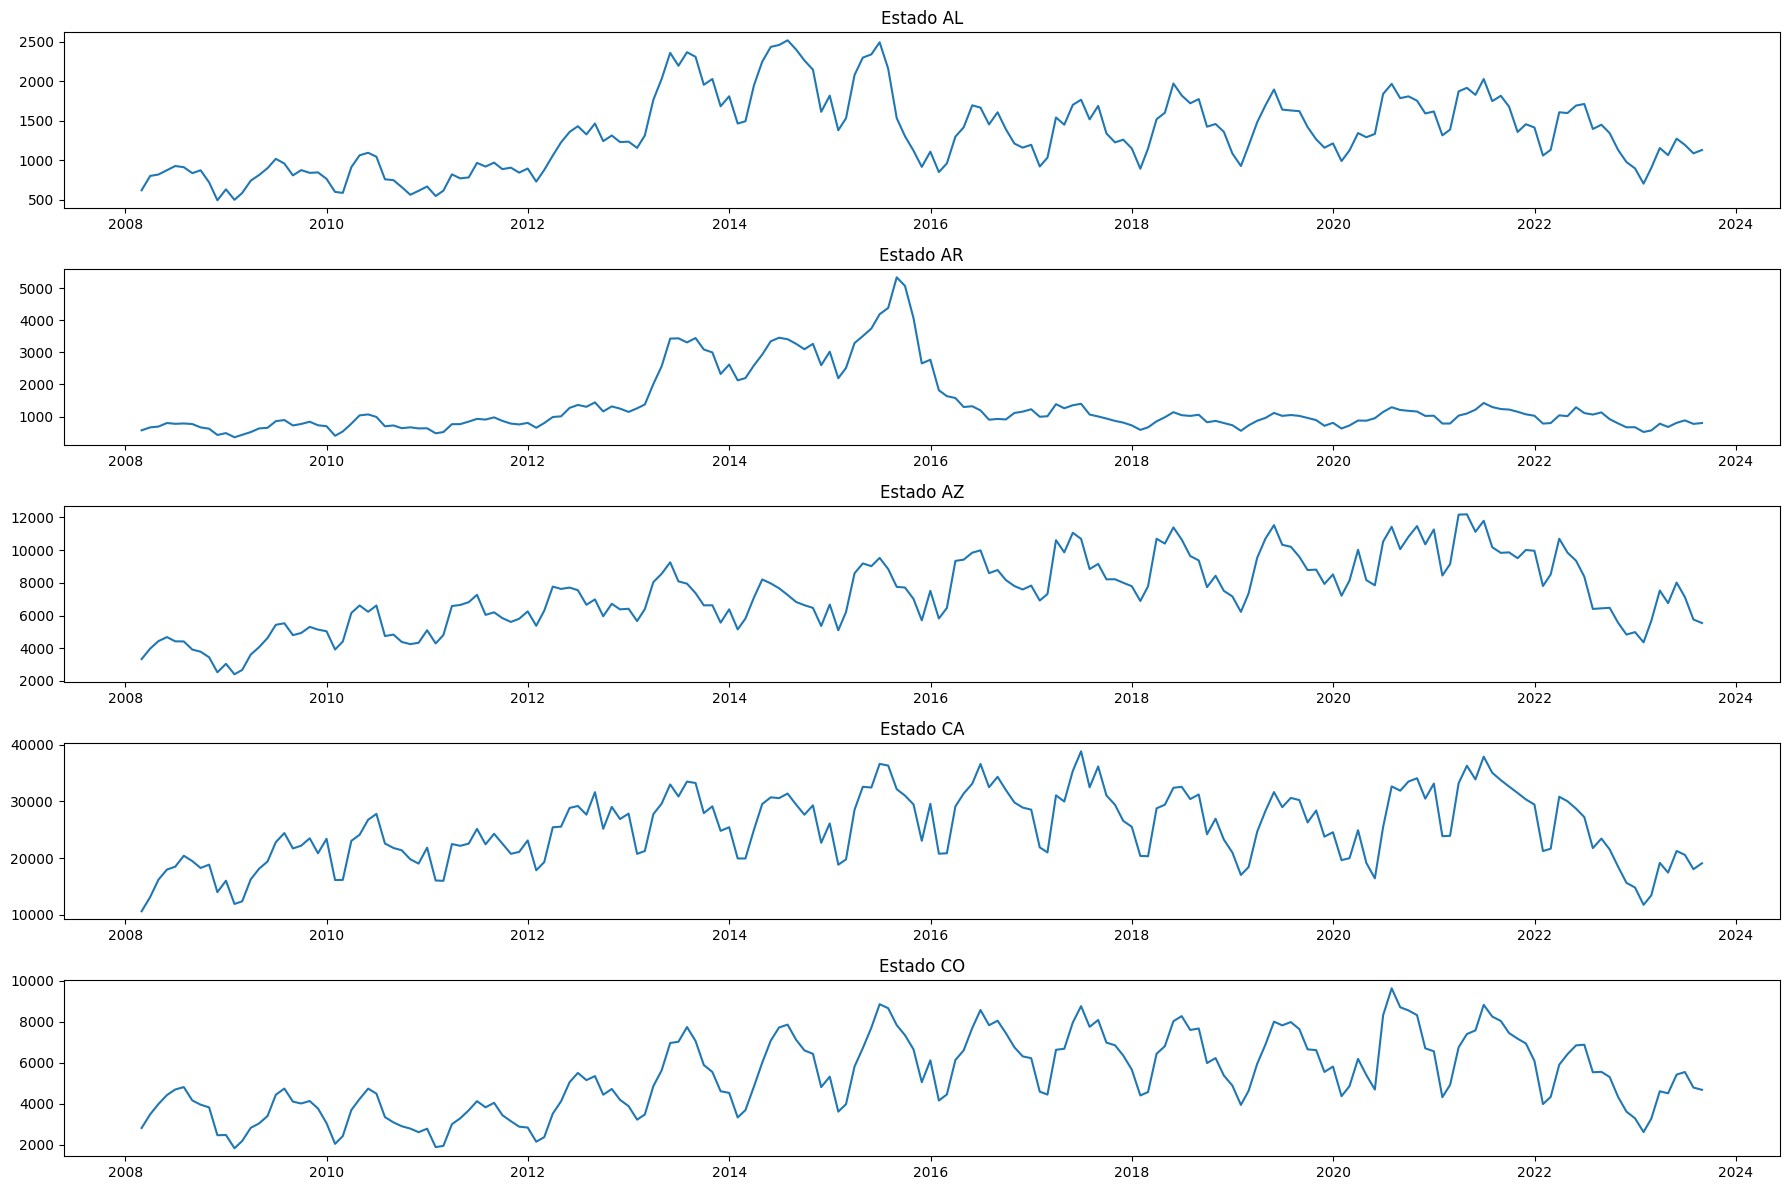

In [10]:
# Crea una figura y subgráficos
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(18, 12))

# Itera sobre los índices de demanda
for idx, column in enumerate(demanda.columns[:5]):
    x = demanda.index
    y = demanda[column]

    # Grafica en el subgráfico correspondiente
    axs[idx].plot(x, y)
    axs[idx].set_title(f'Estado {column}')  # Título del subgráfico

# Ajusta los espacios entre subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

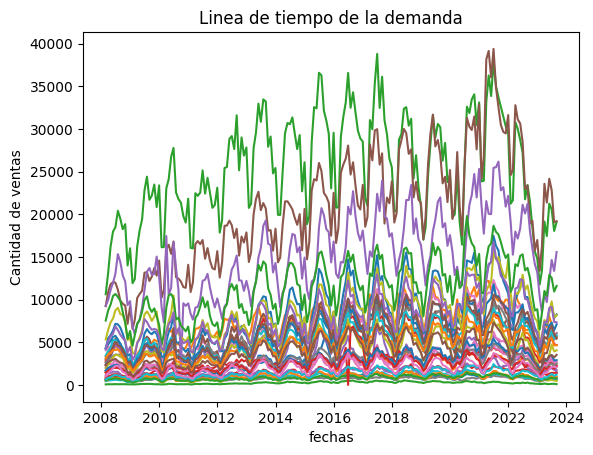

In [11]:
for i in range(1,len(demanda.columns)):
  x = demanda.index
  y = demanda.iloc[:,i].values
  plt.plot(x,y)
  plt.xlabel('fechas')
  plt.ylabel('Cantidad de ventas')

  # displaying the title
  plt.title("Linea de tiempo de la demanda")

plt.show()